In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Encoding Categorical Values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField']
encoder = LabelEncoder()
df[categorical_column] = df[categorical_column].apply(encoder.fit_transform)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Define Features and Target
Y = df['Attrition']
X = df.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [9]:
ros = RandomOverSampler(random_state=42)
X_, Y = ros.fit_resample(X, Y)
X = pd.DataFrame(X_, columns=X.columns)

In [10]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [11]:
print("After Oversampling:")
print(Y.value_counts())

After Oversampling:
Attrition
1    1233
0    1233
Name: count, dtype: int64


In [12]:
# Decision Tree Function
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth=5):

    # train model
    dt = DecisionTreeClassifier(random_state=0, max_depth=my_depth, criterion='entropy')
    dt.fit(X_train, Y_train)

    # test model 
    Y_pred = dt.predict(X_test)

    # metrics
    print('Accuracy = ', accuracy_score(Y_test, Y_pred))
    print('F1 Score = ', f1_score(Y_test, Y_pred))
    print('Precision = ', precision_score(Y_test, Y_pred))
    print('Recall = ', recall_score(Y_test, Y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

    # text representation of decision tree
    features = X_train.columns.tolist()
    text_representation = export_text(dt, feature_names=features)
    print('------------ Text Representation of Decision Tree ----------')
    print(text_representation)

    # plot decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(dt, feature_names=features, class_names=['No', 'Yes'], filled=True, fontsize=10)
    plt.title(f"Decision Tree (max_depth={my_depth})", fontsize=16)
    plt.show()

    return dt

Accuracy =  0.7469635627530364
F1 Score =  0.7228381374722838
Precision =  0.7874396135265701
Recall =  0.6680327868852459
Confusion Matrix:
 [[206  44]
 [ 81 163]]
------------ Text Representation of Decision Tree ----------
|--- OverTime <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- Age <= 32.50
|   |   |   |--- RelationshipSatisfaction <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- RelationshipSatisfaction >  3.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  32.50
|   |   |   |--- Department <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Department >  0.50
|   |   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- StockOptionLevel <= 0.50
|   |   |   |--- JobSatisfaction <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- JobSatisfaction >  1.50
|   |   |   |   |--- class: 0
|   |   |--- StockOptionLevel >  0.50
|   |   |   |--- YearsAtCompany <= 31.50
|   |   |   |   |--- class: 0
|   |   |   |--- YearsAtCompany >  31.50
|   |   

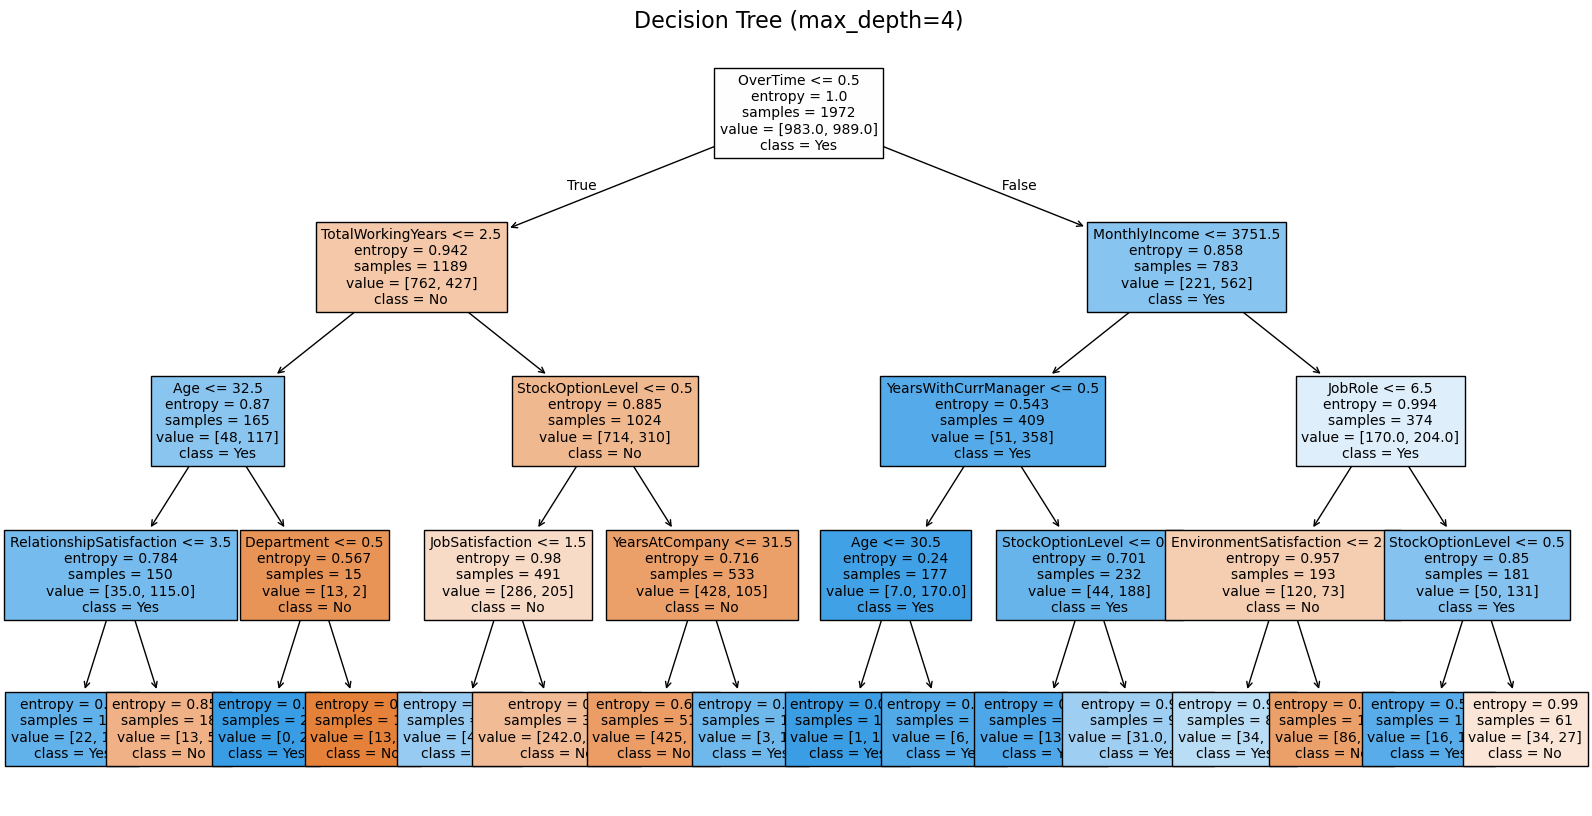

In [13]:
# Train and visualize
dt_model = decision_tree_maker(X_train, y_train, X_test, y_test, 4)

In [14]:
# Feature Importance
def get_feature_importance(dt, X_train):
    importances = dt.feature_importances_
    for importance, name in sorted(zip(importances, X_train.columns), reverse=True):
        print(name, importance)

    plt.figure(figsize=(10, 5))
    plt.bar(X_train.columns, importances, align='center')
    plt.xticks(rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.title("Feature Importance for Decision Tree")
    plt.show()

OverTime 0.3036698110827963
StockOptionLevel 0.1415089071024729
MonthlyIncome 0.13252653563548317
TotalWorkingYears 0.11926100260925997
JobSatisfaction 0.06502263652172671
JobRole 0.056082896698223986
EnvironmentSatisfaction 0.042152935302588436
Age 0.04073935860146963
YearsWithCurrManager 0.02849984841583964
YearsAtCompany 0.028451555045164348
RelationshipSatisfaction 0.027732633685561673
Department 0.0143518792994134
YearsSinceLastPromotion 0.0
YearsInCurrentRole 0.0
WorkLifeBalance 0.0
TrainingTimesLastYear 0.0
PerformanceRating 0.0
PercentSalaryHike 0.0
NumCompaniesWorked 0.0
MonthlyRate 0.0
MaritalStatus 0.0
JobLevel 0.0
JobInvolvement 0.0
HourlyRate 0.0
Gender 0.0
EducationField 0.0
Education 0.0
DistanceFromHome 0.0
DailyRate 0.0
BusinessTravel 0.0


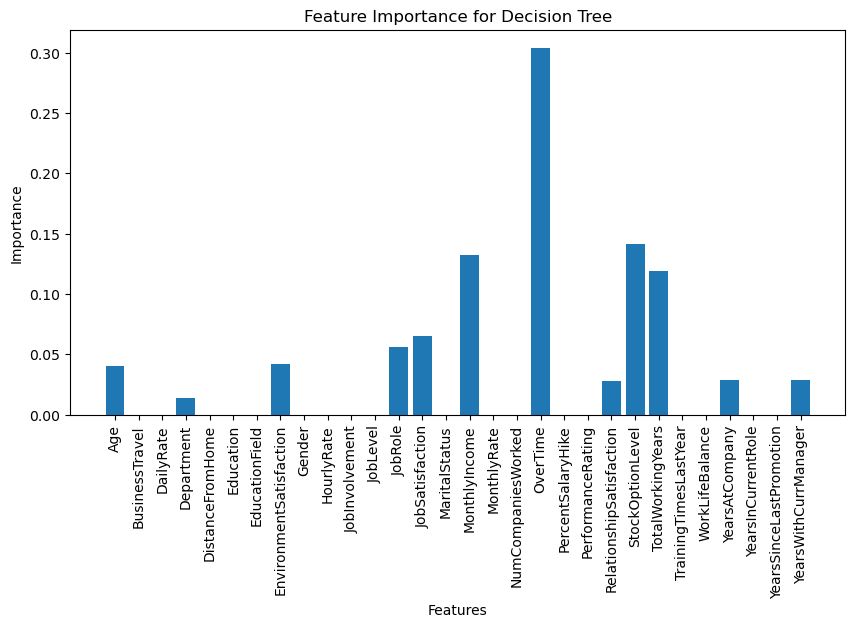

In [15]:
get_feature_importance(dt_model, X_train)

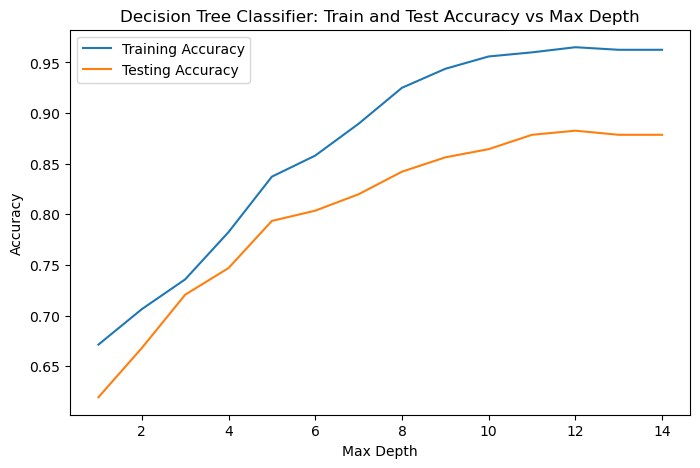

In [16]:
# Accuracy vs Depth
dt_train_accuracy = []
dt_test_accuracy = []

for i in np.arange(1, 15):
    param_grid = {'criterion': ['entropy', 'gini'], 'max_depth': [i], 
                  'max_leaf_nodes': [5, 10, 20, 50, 100], 'random_state': [0]}
    dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_pred = dt.predict(X_test)
    dt_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    dt_test_accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1, 15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1, 15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.show()

In [17]:
# GridSearchCV Function
def gcv(X_train, Y_train, X_test, Y_test):
    scoring = make_scorer(accuracy_score)
    max_depth = [int(x) for x in np.linspace(2, 15, num=10)]

    g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                        param_grid={'criterion': ['gini', 'entropy'],
                                    'max_depth': max_depth,
                                    'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                                    'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                                    'min_samples_split': range(2, 10),
                                    'max_leaf_nodes': [5, 10, 20, 50, 100],
                                    'random_state': [0]},
                        scoring=scoring, cv=5, refit=True)

    g_cv.fit(X_train, Y_train)
    print("Best Params:", g_cv.best_params_)

    # train new model with best params
    dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
    Y_pred = dt_classifier.predict(X_test)
    print('Accuracy = ', accuracy_score(Y_test, Y_pred))
    print('F1 Score = ', f1_score(Y_test, Y_pred))
    print('Precision = ', precision_score(Y_test, Y_pred))
    print('Recall = ', recall_score(Y_test, Y_pred))
    return dt_classifier, g_cv.best_params_

In [18]:
# Run Grid Search CV
dt_classifier, best_params_raw = gcv(X_train, y_train, X_test, y_test)

Best Params: {'criterion': 'gini', 'max_depth': 13, 'max_features': 0.33334, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0}
Accuracy =  0.8846153846153846
F1 Score =  0.8905950095969289
Precision =  0.8375451263537906
Recall =  0.9508196721311475


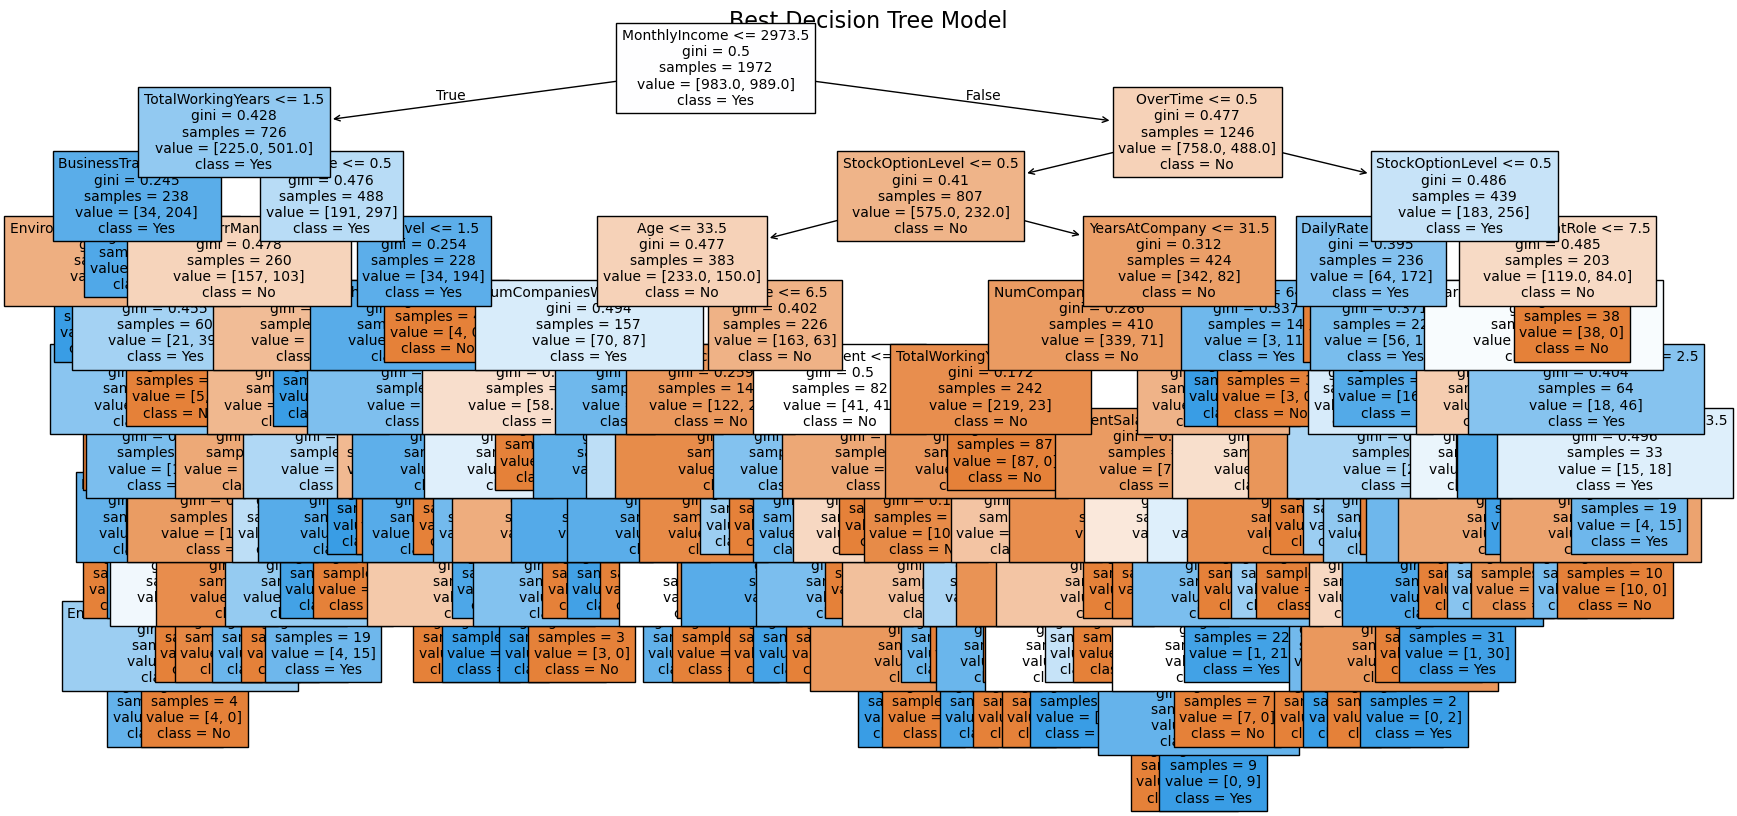

In [19]:
# Visualizing Best Model
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True, fontsize=10)
plt.title("Best Decision Tree Model", fontsize=16)
plt.show()

OverTime 0.12889906509456597
MonthlyIncome 0.12706884617073022
StockOptionLevel 0.05427909175779232
YearsAtCompany 0.053243995412498996
TotalWorkingYears 0.048711474880587156
Age 0.044004404617956426
JobSatisfaction 0.04110249438017794
MonthlyRate 0.041047310817462025
RelationshipSatisfaction 0.04104211198320807
PercentSalaryHike 0.04006498548548284
YearsInCurrentRole 0.039891471927446805
DailyRate 0.03905739635825753
DistanceFromHome 0.03691137287178467
HourlyRate 0.03344270168274278
JobRole 0.030674712786527256
NumCompaniesWorked 0.027906010068478135
EnvironmentSatisfaction 0.027610822624507127
BusinessTravel 0.02456589870715848
YearsWithCurrManager 0.023820900960172434
Department 0.020376130813072543
JobInvolvement 0.017943600205196024
JobLevel 0.016738144781750834
YearsSinceLastPromotion 0.014578080368954189
WorkLifeBalance 0.010266087127930765
EducationField 0.009911723015582439
Gender 0.0068411650999759144
TrainingTimesLastYear 0.0
PerformanceRating 0.0
MaritalStatus 0.0
Educatio

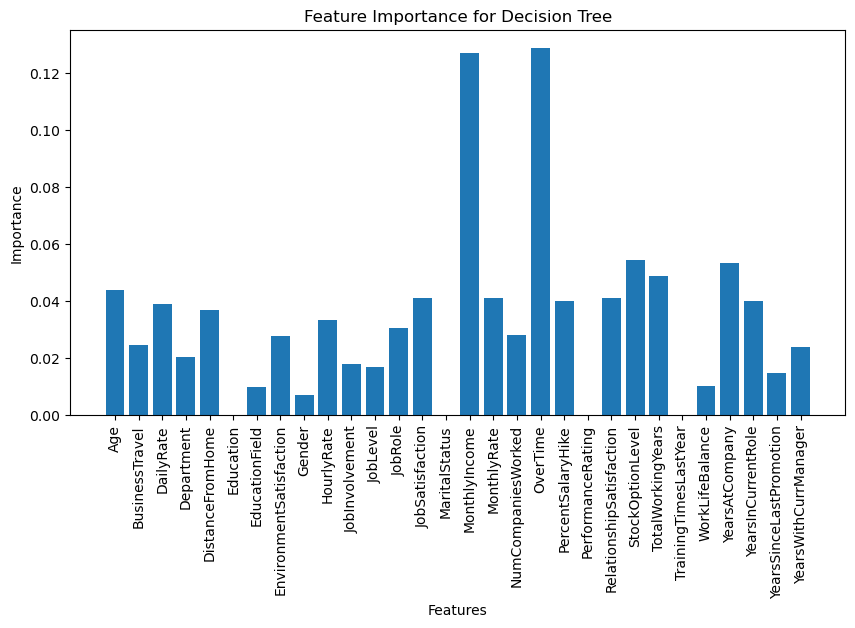

In [20]:
# Feature Importance for Best Model
get_feature_importance(dt_classifier, X_train)

In [21]:
# K-Fold Cross Validation
def cross_validation(model, X, y, my_cv=5):
    scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print(scores)
    print("Accuracy: ", np.mean(scores['test_accuracy']))
    print("Precision: ", np.mean(scores['test_precision']))
    print("Recall: ", np.mean(scores['test_recall']))
    print("F1 Score: ", np.mean(scores['test_f1']))

In [22]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.00682521, 0.00735688, 0.00725126, 0.00841689, 0.00742841]), 'score_time': array([0.00688505, 0.0065589 , 0.00772643, 0.00848436, 0.00742173]), 'test_accuracy': array([0.87044534, 0.88032454, 0.89249493, 0.87221095, 0.84787018]), 'test_precision': array([0.83032491, 0.84057971, 0.83680556, 0.8019802 , 0.82264151]), 'test_recall': array([0.93117409, 0.93927126, 0.9757085 , 0.98780488, 0.88617886]), 'test_f1': array([0.8778626 , 0.88718929, 0.90093458, 0.8852459 , 0.85322896])}
Accuracy:  0.8726691905297649
Precision:  0.826466376580308
Recall:  0.9440275171982488
F1 Score:  0.8808922663718939


In [23]:
# Save final performance

import sys
sys.path.append(r"C:\Users\sanjy\Downloads\Employee_Attrition_Prediction")
from utils import save_performance

final_dt = DecisionTreeClassifier(**best_params_raw)
scores = cross_validate(final_dt, X, Y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

performance_dict = {
    "accuracy": np.mean(scores['test_accuracy']),
    "precision": np.mean(scores['test_precision']),
    "recall": np.mean(scores['test_recall']),
    "f1": np.mean(scores['test_f1'])
}

save_performance("DT_oversampled", performance_dict)

Saved performance for DT_oversampled
